# Simulation framework for *Littorina* project

To start analysis load packages, styles and initialize (run) functions

## Packages, dependencies, functions 

In [1]:
import msprime
import numpy as np
import scipy
from IPython.display import SVG
import tskit
import matplotlib.pyplot as plt
import matplotlib as ml
import pandas as pd
import seaborn as sns
import io
import collections
import random
import demesdraw

In [2]:
def set_demography_migr_P3toP2(t1,t2,t3,mig_rate,NeP1,NeP2,NeP3,NeO,NeP12,NeP123,NeANC):
    demography = msprime.Demography()
    
    #initializing populations
    demography.add_population(name="P1", initial_size=NeP1)
    demography.add_population(name="P2", initial_size=NeP2)
    demography.add_population(name="P3", initial_size=NeP3)
    demography.add_population(name="O", initial_size=NeO)
    demography.add_population(name="P12", initial_size=NeP12)
    demography.add_population(name="P123", initial_size=NeP123)
    demography.add_population(name="ANC", initial_size=NeANC)
    
    #adding split times
    demography.add_population_split(time=t1, derived=["P1", "P2"], ancestral="P12")
    demography.add_population_split(time=t2, derived=["P12", "P3"], ancestral="P123")
    demography.add_population_split(time=t3, derived=["P123", "O"], ancestral="ANC")
    
    #setting up gene flow
    demography.set_migration_rate("P2", "P3", mig_rate)
    
    #Simultanious test
    ml.rcParams['figure.figsize'] = (8.0, 5.0)
    graph = msprime.Demography.to_demes(demography)
    fig, ax = plt.subplots()  # use plt.rcParams["figure.figsize"]
    demesdraw.tubes(graph, ax=ax, seed=1)
    plt.show()
    
    print(demography)

    return demography

def set_demography_migr_P3toP2_s(t1,t2,t3,mig_rate,NeP1,NeP2,NeP3,NeO,NeP12,NeP123,NeANC):
    demography = msprime.Demography()
    
    #initializing populations
    demography.add_population(name="P1", initial_size=NeP1)
    demography.add_population(name="P2", initial_size=NeP2)
    demography.add_population(name="P3", initial_size=NeP3)
    demography.add_population(name="O", initial_size=NeO)
    demography.add_population(name="P12", initial_size=NeP12)
    demography.add_population(name="P123", initial_size=NeP123)
    demography.add_population(name="ANC", initial_size=NeANC)
    
    #adding split times
    demography.add_population_split(time=t1, derived=["P1", "P2"], ancestral="P12")
    demography.add_population_split(time=t2, derived=["P12", "P3"], ancestral="P123")
    demography.add_population_split(time=t3, derived=["P123", "O"], ancestral="ANC")
    
    #setting up gene flow
    demography.set_migration_rate("P2", "P3", mig_rate)

    return demography

def set_demography_migr_twoway(t1,t2,t3,mig_rate,NeP1,NeP2,NeP3,NeO,NeP12,NeP123,NeANC):
    demography = msprime.Demography()
    
    #initializing populations
    demography.add_population(name="P1", initial_size=NeP1)
    demography.add_population(name="P2", initial_size=NeP2)
    demography.add_population(name="P3", initial_size=NeP3)
    demography.add_population(name="O", initial_size=NeO)
    demography.add_population(name="P12", initial_size=NeP12)
    demography.add_population(name="P123", initial_size=NeP123)
    demography.add_population(name="ANC", initial_size=NeANC)
    
    #adding split times
    demography.add_population_split(time=t1, derived=["P1", "P2"], ancestral="P12")
    demography.add_population_split(time=t2, derived=["P12", "P3"], ancestral="P123")
    demography.add_population_split(time=t3, derived=["P123", "O"], ancestral="ANC")
    
    #setting up gene flow
    #demography.set_migration_rate("P2", "P3", mig_rate)
    demography.set_symmetric_migration_rate(populations=["P2", "P3"],rate=0.2)
    
    
    #Simultanious test
    ml.rcParams['figure.figsize'] = (8.0, 5.0)
    graph = msprime.Demography.to_demes(demography)
    fig, ax = plt.subplots()  # use plt.rcParams["figure.figsize"]
    demesdraw.tubes(graph, ax=ax, seed=1)
    plt.show()
    
    print(demography)

    return demography

def set_demography_migr_twoway_s(t1,t2,t3,mig_rate,NeP1,NeP2,NeP3,NeO,NeP12,NeP123,NeANC):
    demography = msprime.Demography()
    
    #initializing populations
    demography.add_population(name="P1", initial_size=NeP1)
    demography.add_population(name="P2", initial_size=NeP2)
    demography.add_population(name="P3", initial_size=NeP3)
    demography.add_population(name="O", initial_size=NeO)
    demography.add_population(name="P12", initial_size=NeP12)
    demography.add_population(name="P123", initial_size=NeP123)
    demography.add_population(name="ANC", initial_size=NeANC)
    
    #adding split times
    demography.add_population_split(time=t1, derived=["P1", "P2"], ancestral="P12")
    demography.add_population_split(time=t2, derived=["P12", "P3"], ancestral="P123")
    demography.add_population_split(time=t3, derived=["P123", "O"], ancestral="ANC")
    
    #setting up gene flow
    #demography.set_migration_rate("P2", "P3", mig_rate)
    demography.set_symmetric_migration_rate(populations=["P2", "P3"],rate=0.2)
    
    return demography

def simulate_windows(num_genealogies,demography,nP1,nP2,nP3,n0):
    ancestry_reps = msprime.sim_ancestry(samples={"P1": nP1, "P2": nP2, "P3": nP3, "O": n0}, 
                                         demography=demography, sequence_length=10000,
                                         num_replicates=num_genealogies, ploidy=1)
    for ts in ancestry_reps:
        mutated_ts = msprime.sim_mutations(ts, rate=(1/100000))
        yield mutated_ts

def tern_simulate_P3P2():
    demography=set_demography_migr_P3toP2(t1,t2,t3,mig_rate,NeP1,NeP2,NeP3,NeO,NeP12,NeP123,NeANC)
    windows=simulate_windows(num_genealogies,demography,nP1,nP2,nP3,n0)

    return windows

def tern_simulate_P3P2_s():
    demography=set_demography_migr_P3toP2_s(t1,t2,t3,mig_rate,NeP1,NeP2,NeP3,NeO,NeP12,NeP123,NeANC)
    windows=simulate_windows(num_genealogies,demography,nP1,nP2,nP3,n0)

    return windows

def tern_simulate_twoway():
    demography=set_demography_migr_twoway(t1,t2,t3,mig_rate,NeP1,NeP2,NeP3,NeO,NeP12,NeP123,NeANC)
    windows=simulate_windows(num_genealogies,demography,nP1,nP2,nP3,n0)

    return windows

def tern_simulate_twoway_s():
    demography=set_demography_migr_twoway_s(t1,t2,t3,mig_rate,NeP1,NeP2,NeP3,NeO,NeP12,NeP123,NeANC)
    windows=simulate_windows(num_genealogies,demography,nP1,nP2,nP3,n0)

    return windows

def ts_newick_rename_dict_hun():
    sample_names = dict()
    
    #Total number of empirical samples
    ntotal=nP1+nP2+nP3+n0

    #Creating list of newick names
    ts_name=list()
    for i in range(1,ntotal+1):
        ts_name.append(","+str(i)+":")

    #Creating list of population samples    
    nP1_names=list()
    for i in range(1,nP1+1):
        nP1_names.append(",P1_"+str(i)+":")

    nP2_names=list()
    for i in range(1,nP2+1):
        nP2_names.append(",P2_"+str(i)+":")

    nP3_names=list()
    for i in range(1,nP3+1):
        nP3_names.append(",P3_"+str(i)+":")

    n0_names=list()
    for i in range(1,n0+1):
        n0_names.append(",O_"+str(i)+":")

    pop_names=nP1_names+nP2_names+nP3_names+n0_names

    #Using dictionary comprehension to convert lists to dictionary
    sample_names = {ts_name[i]: pop_names[i] for i in range(len(ts_name))}
    
    return sample_names

def ts_newick_rename_dict_tens():
    sample_names = dict()
    
    #Total number of empirical samples
    ntotal=nP1+nP2+nP3+n0

    #Creating list of newick names
    ts_name=list()
    for i in range(1,ntotal+1):
        ts_name.append("("+str(i)+":")

    #Creating list of population samples    
    nP1_names=list()
    for i in range(1,nP1+1):
        nP1_names.append("("+"P1_"+str(i)+":")

    nP2_names=list()
    for i in range(1,nP2+1):
        nP2_names.append("("+"P2_"+str(i)+":")

    nP3_names=list()
    for i in range(1,nP3+1):
        nP3_names.append("("+"P3_"+str(i)+":")

    n0_names=list()
    for i in range(1,n0+1):
        n0_names.append("("+"O_"+str(i)+":")

    pop_names=nP1_names+nP2_names+nP3_names+n0_names

    #Using dictionary comprehension to convert lists to dictionary
    sample_names = {ts_name[i]: pop_names[i] for i in range(len(ts_name))}
    
    return sample_names

def ts_newick_rename(genealogies):
    renamed_newick=[]
    for replicate_index, ts in enumerate(genealogies):
        for t in ts.trees():
            newick=t.newick(precision=1)
            replace_strings = ts_newick_rename_dict()
            
            for word in replace_strings.items():
                newick = newick.replace(str(word[0]), str(word[1]))
            print(newick)

def tern_simulate_debug():
    num_genealogies = 3
    
    if model == 'one_way':
        print('Model selected: '+'one_way')
        genealogies=tern_simulate_P3P2()
        
    if model == 'two_way':
        print('Model selected: '+'two_way')
        genealogies=tern_simulate_twoway()
        
    for replicate_index, ts in enumerate(genealogies):
    #colormap={"P1": "red", "P2": "red", "P3": "green", "O":"blue"}
    #node_colours = {u: colormap[ts.population(u)] for u in ts.nodes()}
        for t in ts.trees():
        #node_colours = {u: colormap[t.population(u)] for u in t.nodes()}
            print("Genealogy #"+str(replicate_index))
            print("Number of mutations on the tree "+str(t.num_mutations))
            display(SVG(t.draw_svg(size=((nP1+nP2+nP3+n0)*25, 300))))
            newick=t.newick(precision=1)
            replace_strings_tens= ts_newick_rename_dict_tens()            
            replace_strings_hun=ts_newick_rename_dict_hun()
            for word in replace_strings_tens.items():
                newick = newick.replace(str(word[0]), str(word[1]))
                for word in replace_strings_hun.items():
                    newick = newick.replace(str(word[0]), str(word[1]))
            print(newick)
            print(" ")
            print(" ")
            
    
def tern_simulate(path):
    file = open(path, "w")
    
    if model == 'one_way':
        genealogies=tern_simulate_P3P2_s()
        
    if model == 'two_way':
        genealogies=tern_simulate_twoway_s()
        
    for replicate_index, ts in enumerate(genealogies):
        for t in ts.trees():
            newick=t.newick(precision=1)
            replace_strings_tens= ts_newick_rename_dict_tens()            
            replace_strings_hun=ts_newick_rename_dict_hun()
            for word in replace_strings_tens.items():
                newick = newick.replace(str(word[0]), str(word[1]))
                for word in replace_strings_hun.items():
                    newick = newick.replace(str(word[0]), str(word[1]))
            file.write(newick+"\n")
            
    file.close()

## Running example

Here we define custom demographic models similar to Martin et al.

**Fixed parameters**:  
- length window is 10000 (10kb)
- mutation rate = 1/10000
> Note: We assume no recombination within the window, recombination is not included in the simulation

**Parameters to specify are**:
- three split times $t_1$(=$t_{12}$), $t_2$(=$t_{23}$), $t_3$(split time with outgroup)
- $N_e$ for each of  populations
- `mig_rate` migration rate (can be set to 0)
- choose between demographic models: one way migration P3 to P2 = `'one_way'`, two way = `'two_way'`  
- number of genealogies/windows to simulate `num_genealogies`


In [144]:
###PLEASE DO NOT RENAME VARIABLES

#Specify number of genealogies to simulate
num_genealogies = 10000

#Choose the model
model = 'one_way' # 'one_way', 'two_way'

#Number of samples per population
nP1=20
nP2=20
nP3=20
n0=20

#Provide divergence times
t1=5000
t2=5050
t3=5100

#Provide migration rate
mig_rate=0

#Provide population sizes
NeP1=500
NeP2=500
NeP3=500
NeO=500
NeP12=500
NeP123=500
NeANC=500

#Provide path to the file to save your results
path="/Users/sstankow/Documents/GitHub/Littorina_reproductive_mode/MSPrime_sims/Y0.tree"
tern_simulate(path)

In order to check the model we provide debugging function:

In [281]:
###PLEASE DO NOT RENAME VARIABLES

#Specify number of genealogies to simulate
num_genealogies = 1

#Choose the model
model = 'one_way' # 'one_way', 'two_way'

#Number of samples per population
nP1=20
nP2=20
nP3=20
n0=20

#Provide divergence times
t1=90
t2=220
t3=270

#Provide migration rate
mig_rate=0

#Provide population sizes
NeP1=500
NeP2=500
NeP3=500
NeO=500
NeP12=500
NeP123=500
NeANC=500

Model selected: one_way


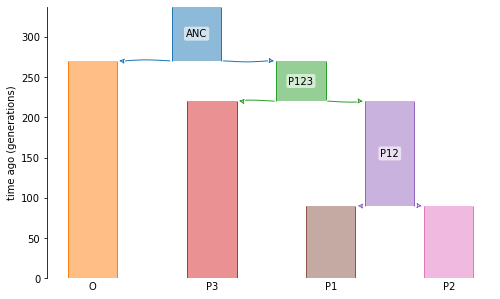

Demography
╟  Populations
║  ┌───────────────────────────────────────────────────────────────────────────────────────────────┐
║  │ id │name  │description  │initial_size  │ growth_rate │  default_sampling_time│extra_metadata  │
║  ├───────────────────────────────────────────────────────────────────────────────────────────────┤
║  │ 0  │P1    │             │500.0         │      0      │                      0│{}              │
║  │ 1  │P2    │             │500.0         │      0      │                      0│{}              │
║  │ 2  │P3    │             │500.0         │      0      │                      0│{}              │
║  │ 3  │O     │             │500.0         │      0      │                      0│{}              │
║  │ 4  │P12   │             │500.0         │      0      │                     90│{}              │
║  │ 5  │P123  │             │500.0         │      0      │                2.2e+02│{}              │
║  │ 6  │ANC   │             │500.0         │      0      │      

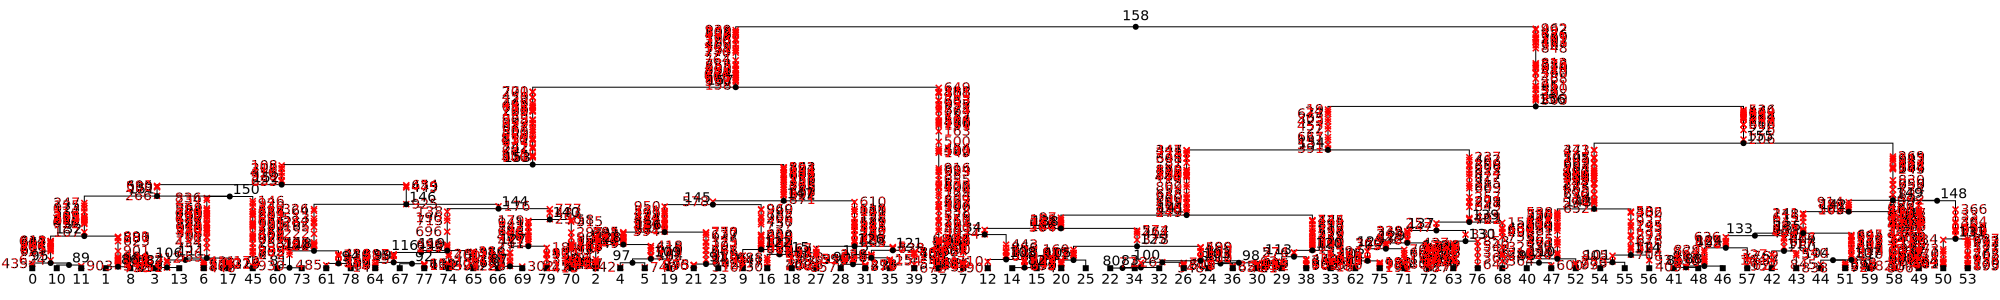

((((O_9:157.5,((O_13:86.3,(O_12:66.5,(O_3:25.0,O_16:25.0):41.4):19.9):42.4,(O_4:92.4,O_17:92.4):36.4):28.7):246.3,((P2_14:60.9,(P2_10:39.1,P2_19:39.1):21.8):120.4,((((P2_11:18.5,(P2_5:15.8,P2_17:15.8):2.8):6.8,(P2_7:20.2,(P2_13:2.3,(P2_3:0.5,P2_15:0.5):1.8):17.9):5.1):49.4,(P2_1:27.7,P2_6:27.7):47.0):61.2,(P1_8:114.7,(P1_13:29.8,(P1_15:2.1,P1_16:2.1):27.7):85.0):21.2):45.3):222.5):148.5,(((P3_13:31.9,(P3_1:18.5,P3_8:18.5):13.4):170.4,(P3_17:44.9,(P3_15:20.2,P3_16:20.2):24.7):157.5):224.5,((P3_19:193.1,((P3_20:28.3,(P3_5:27.4,P3_12:27.4):0.9):91.4,((P3_3:58.9,P3_4:58.9):52.2,(P3_18:69.6,(P3_7:7.3,(P3_2:2.7,P3_9:2.7):4.6):62.3):41.5):8.6):73.4):38.7,(P3_10:230.3,(P3_11:100.0,P3_14:100.0):130.3):1.5):195.1):125.4):271.8,(P2_18:617.9,(((P2_8:74.8,(P2_20:61.0,(P2_16:35.5,(P2_9:13.4,P2_12:13.4):22.1):25.5):13.7):155.2,((P1_10:63.8,(P1_17:47.1,P1_19:47.1):16.6):153.3,((P2_2:14.1,P2_4:14.1):109.1,(P1_3:80.7,(P1_20:31.7,(P1_5:18.5,P1_6:18.5):13.2):49.0):42.5):93.8):13.0):123.7,((((O_1:1.4,O_14:

In [282]:
tern_simulate_debug()

# main sims

In [3]:
###PLEASE DO NOT RENAME VARIABLES

#Specify number of genealogies to simulate
num_genealogies = 100000

#Choose the model
model = 'one_way' # 'one_way', 'two_way'

#Number of samples per population
nP1=20
nP2=20
nP3=20
n0=20

#Provide divergence times
t1=100
t2=200
t3=300

#Provide migration rate
mig_rate=0

#Provide population sizes
NeP1=500
NeP2=500
NeP3=500
NeO=500
NeP12=500
NeP123=500
NeANC=500

#Provide path to the file to save your results
path="/Users/sstankow/Documents/GitHub/Littorina_reproductive_mode/MSPrime_sims/100k_100_200_300.tree"
tern_simulate(path)

In [242]:
###PLEASE DO NOT RENAME VARIABLES

#Specify number of genealogies to simulate
num_genealogies = 1000

#Choose the model
model = 'one_way' # 'one_way', 'two_way'

#Number of samples per population
nP1=20
nP2=20
nP3=20
n0=20

#Provide divergence times
t1=405
t2=1185
t3=1215

#Provide migration rate
mig_rate=0

#Provide population sizes
NeP1=500
NeP2=500
NeP3=500
NeO=500
NeP12=500
NeP123=500
NeANC=500

#Provide path to the file to save your results
path="/Users/sstankow/Documents/GitHub/Littorina_reproductive_mode/MSPrime_sims/A8.tree"
tern_simulate(path)